# In-Class Activity 02/20
In today's in-class activity, we will be creating and visualizing a few different graphs, and (if we have time), working on an example of using an embedding model (Word2Vec) to gauge similarity between different text documents (sentences).

In [5]:
# Import NetworkX and other necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Importing libraries needed for the text analysis at the end
from gensim import downloader
from gensim.models import KeyedVectors
from scipy import spatial

## Creating a Directed Graph

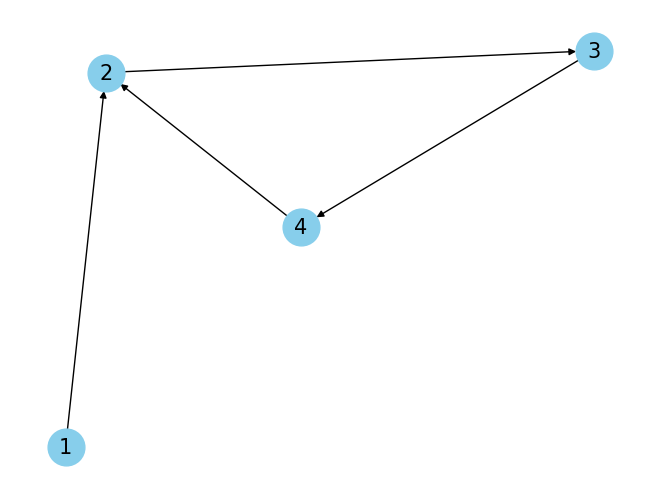

In [2]:
# Creating a Directed Graph
D = nx.DiGraph()

# Adding nodes and directed edges
D.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 2)])

# Visualizing the Directed Graph
nx.draw(D, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', linewidths=1, font_size=15, arrows=True)
plt.show()

Now, I'd like you to add three new directed edges to the graph. Feel free to add new nodes if you'd like, or you can just add new edges between existing nodes.

## Understanding and Manipulating Edge Weights

Weight of edge (2,3): 1.5


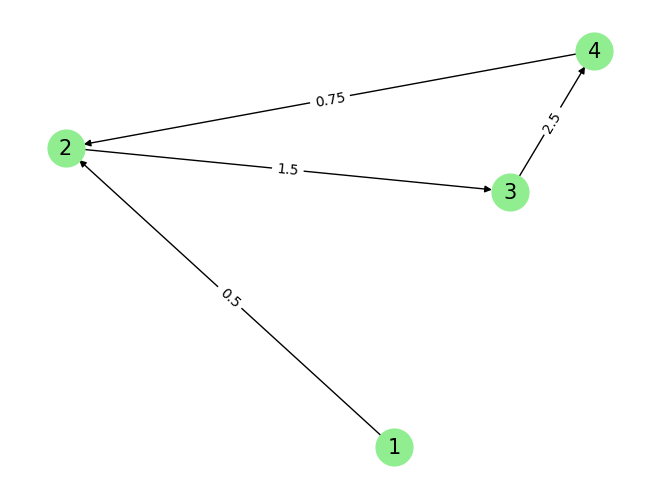

In [3]:
# Creating a Weighted Graph
WG = nx.DiGraph()

# Adding nodes with weights
WG.add_weighted_edges_from([(1, 2, 0.5), (2, 3, 1.5), (3, 4, 2.5), (4, 2, 0.75)])

# Accessing edge weight
print("Weight of edge (2,3):", WG[2][3]['weight'])

# Visualizing the Weighted Graph with edge labels
pos = nx.spring_layout(WG)
nx.draw(WG, pos, with_labels=True, node_color='lightgreen', node_size=700, edge_color='k', linewidths=1, font_size=15, arrows=True)

# Draw edge labels
edge_labels = nx.get_edge_attributes(WG, 'weight')
nx.draw_networkx_edge_labels(WG, pos, edge_labels=edge_labels)
plt.show()

Similar to the activity above, I'd like you to add additional edges. This time, I'd like you to add four new edges and at least one new node. After that, do the following:

1. Calculate the shortest path between node 1 and node 4
2. Calculate the in- and out-degree centrality of node 3

## Building a Sentence Similiarity Network
In this activity, you will use pre-trained embeddings from `Word2Vec` to calculate similarities between sentences. You will then create a network where each node is a sentence, and edges are weighted by these similarity scores.

### Step 1: Write some Sentences and Load the Model

In [15]:
# List of sentences (nodes)
# Feel free to replace these sentences with your own!
sentences = [
    "The cat sat on the mat.",
    "A dog sat in the garden.",
    "The sun shines brightly.",
    "The moon glows in the night sky.",
    "Dogs and cats are common pets."
]

# Load a pre-trained Word2Vec model
print(list(downloader.info()['models'].keys()))

# Note: This loads a model trained on Google News dataset; it's large but comprehensive.
model = downloader.load('word2vec-google-news-300')

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [19]:
# Showing the vector for a given word
model.get_vector('cat')

array([ 0.0123291 ,  0.20410156, -0.28515625,  0.21679688,  0.11816406,
        0.08300781,  0.04980469, -0.00952148,  0.22070312, -0.12597656,
        0.08056641, -0.5859375 , -0.00445557, -0.296875  , -0.01312256,
       -0.08349609,  0.05053711,  0.15136719, -0.44921875, -0.0135498 ,
        0.21484375, -0.14746094,  0.22460938, -0.125     , -0.09716797,
        0.24902344, -0.2890625 ,  0.36523438,  0.41210938, -0.0859375 ,
       -0.07861328, -0.19726562, -0.09082031, -0.14160156, -0.10253906,
        0.13085938, -0.00346375,  0.07226562,  0.04418945,  0.34570312,
        0.07470703, -0.11230469,  0.06738281,  0.11230469,  0.01977539,
       -0.12353516,  0.20996094, -0.07226562, -0.02783203,  0.05541992,
       -0.33398438,  0.08544922,  0.34375   ,  0.13964844,  0.04931641,
       -0.13476562,  0.16308594, -0.37304688,  0.39648438,  0.10693359,
        0.22167969,  0.21289062, -0.08984375,  0.20703125,  0.08935547,
       -0.08251953,  0.05957031,  0.10205078, -0.19238281, -0.09

In [20]:
# Getting similar words
model.most_similar('cat')


[('cats', 0.8099379539489746),
 ('dog', 0.760945737361908),
 ('kitten', 0.7464985251426697),
 ('feline', 0.7326234579086304),
 ('beagle', 0.7150582671165466),
 ('puppy', 0.7075453400611877),
 ('pup', 0.6934291124343872),
 ('pet', 0.6891531348228455),
 ('felines', 0.6755931973457336),
 ('chihuahua', 0.6709762215614319)]

In [11]:
# Function to calculate average vector for a sentence
def sentence_vector(sentence):
    words = sentence.lower().split()
    word_vectors = [model[key] for key in words if key in model.key_to_index]
    
    if len(word_vectors) >= 1:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Calculate similarity matrix
similarity_matrix = np.zeros((len(sentences), len(sentences)))

for i, sentence1 in enumerate(sentences):
    for j, sentence2 in enumerate(sentences):
        if i != j:
            vector1 = sentence_vector(sentence1)
            vector2 = sentence_vector(sentence2)
            similarity_matrix[i][j] = 1 - spatial.distance.cosine(vector1, vector2)

print(similarity_matrix)

[[0.         0.88047701 0.31235918 0.49116084 0.42458707]
 [0.88047701 0.         0.29362094 0.43437481 0.48713094]
 [0.31235918 0.29362094 0.         0.6413638  0.13593172]
 [0.49116084 0.43437481 0.6413638  0.         0.18156442]
 [0.42458707 0.48713094 0.13593172 0.18156442 0.        ]]


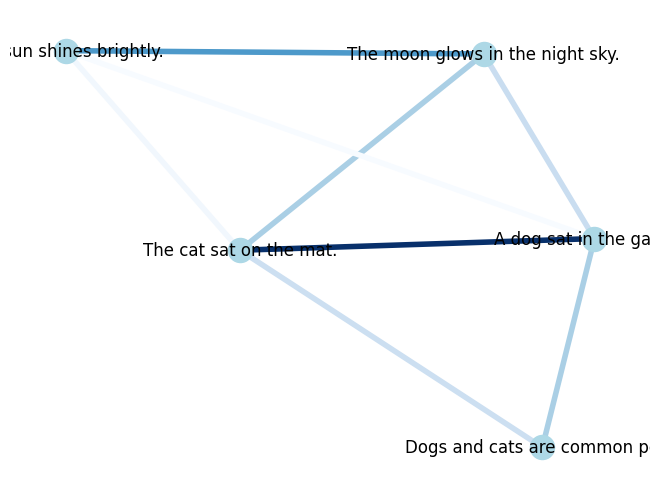

In [12]:
# Creating the network
S = nx.Graph()

# Adding nodes
for sentence in sentences:
    S.add_node(sentence)

# Adding weighted edges based on sentence similarity
for i, sentence1 in enumerate(sentences):
    for j, sentence2 in enumerate(sentences):
        if i < j and similarity_matrix[i][j] > 0.2:  # Threshold to avoid overly dense network
            S.add_edge(sentence1, sentence2, weight=round(similarity_matrix[i][j], 2))

# Visualizing the network
pos = nx.spring_layout(S)
edges, weights = zip(*nx.get_edge_attributes(S,'weight').items())

nx.draw(S, pos, node_color='lightblue', edgelist=edges, edge_color=weights, width=4.0, edge_cmap=plt.cm.Blues, with_labels=True)
plt.show()